In [1]:
import pandas as pd
import pickle 
import numpy as np
import datetime as dt
### Read the dataFile 
Read = pickle.load( open( "uke_eggedal_data_challenge.pkl", "rb" ) )

#save data on my variable
data  = {}
for ids,sets in Read.items():
    data[ids] = sets

#Check keys and data types in the  dic
for ids,sets in data.items():
    print(ids, f', Dtype = {type(sets)}, Total values in Set:{len(sets)}')

flow , Dtype = <class 'numpy.ndarray'>, Total values in Set:21542
obs_tas , Dtype = <class 'numpy.ndarray'>, Total values in Set:21546
flow_dates , Dtype = <class 'pandas.core.series.Series'>, Total values in Set:21542
obs_lon_lat , Dtype = <class 'list'>, Total values in Set:2
obs_pr , Dtype = <class 'numpy.ndarray'>, Total values in Set:21546
obs_dates , Dtype = <class 'pandas.core.series.Series'>, Total values in Set:21546


In [2]:
#Separate the obs_tas and obs_pr arrays into individual columns to make things easier to see
Temp = {}
precipitation ={}

#create dummy data for dictionary depending on lenght of values 
for i in data['obs_pr']:
    Length = len(i)
    for j in range (Length):
        precipitation[f'Prec_Zone_{j}'] = []
#Fill the empty list with the corresponding data 
index = 0
for ids,val in precipitation.items():
    for i in data['obs_pr']:
        precipitation[ids].insert(index,i[index])
    index = index+1
dfprecipitation = pd.DataFrame(precipitation)

In [3]:
# Repeat for Temperature

#create dummy data for dictionary depending on lenght of values 
for i in data['obs_tas']:
    Length = len(i)
    for j in range (Length):
        Temp[f'Temp_Zone_{j}'] = []
#Fill the empty list with the corresponding data 
index = 0
for ids,val in Temp.items():
    for i in data['obs_tas']:
        Temp[ids].insert(index,i[index])
    index = index+1  
dfTemp = pd.DataFrame(Temp)

In [4]:
#add the date to each DF 
dfTemp['Date'] = data['obs_dates'].reset_index(drop=True) # Reset Index to keep same index as initial DF
dfTemp['Date'] = pd.to_datetime(dfTemp['Date'])
dfprecipitation['Date'] = data['obs_dates'].reset_index(drop=True) # Reset Index to keep same index as initial DF
dfprecipitation['Date'] = pd.to_datetime(dfprecipitation['Date'])

# Create new DataFrame for all data together
DfTemp_Prec = dfprecipitation.merge(dfTemp, how='inner', on='Date')
#Create DataFrame for de Flow data
dfFlow = pd.DataFrame(data['flow'],columns = ['Flow'])
dfFlow['Date'] = data['flow_dates'].reset_index(drop=True)
#Now we merge the two datasets where the dates are the same 
Df_Final= DfTemp_Prec.merge(dfFlow, how='inner', on='Date')
Df_Final

,Prec_Zone_0,Prec_Zone_1,Prec_Zone_2,Prec_Zone_3,Prec_Zone_4,Prec_Zone_5,Prec_Zone_6,Prec_Zone_7,Prec_Zone_8,Date,Temp_Zone_0,Temp_Zone_1,Temp_Zone_2,Temp_Zone_3,Temp_Zone_4,Temp_Zone_5,Temp_Zone_6,Temp_Zone_7,Temp_Zone_8,Flow
0,0.0,0.1,0.0,0.4,0.0,0.1,4.7,0.0,0.0,1958-01-04,-14.700000,-8.9,-4.200000,4.9,4.5,3.1,-0.5,-1.6,-2.4,1.723781
1,0.0,0.0,1.0,0.0,0.7,0.0,1.1,0.0,0.0,1958-01-05,-10.300000,-15.1,-11.000000,0.0,4.6,4.8,3.1,1.4,-0.3,0.960882
2,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1958-01-06,-12.900000,-10.6,-15.700000,-9.7,-0.5,4.5,5.2,3.0,2.6,0.001000
3,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,1958-01-07,-11.900000,-13.6,-13.800000,-16.0,-9.2,-1.0,5.4,3.4,2.7,0.001000
4,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,1958-01-08,-4.100000,-11.3,-16.200001,-11.3,-15.2,-9.6,0.4,4.0,2.3,0.316796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,9.3,1.7,0.0,0.0,0.0,0.0,0.0,0.0,3.9,2015-12-27,-7.900000,-1.3,0.300000,1.4,4.0,1.2,-2.2,-2.2,-2.5,2.177040
21174,1.0,8.6,2.5,0.0,0.0,0.0,1.9,0.0,4.0,2015-12-28,-16.200001,-7.8,-0.800000,-2.2,0.9,5.3,0.9,-0.8,-1.5,4.876250
21175,0.1,0.0,8.0,2.6,0.0,0.0,0.0,1.7,0.0,2015-12-29,-23.600000,-16.0,-9.500000,-0.8,-2.7,1.6,4.8,2.7,-0.3,4.998840
21176,0.0,0.0,1.0,8.9,3.0,0.0,0.0,0.0,0.5,2015-12-30,-20.500000,-22.5,-14.100000,-7.6,-0.9,-1.7,1.6,6.2,4.0,4.428777


In [5]:
# now we can take a range of dates to star working on de prediction i will take from 1980 to 2014 
working_Df = Df_Final[(Df_Final['Date'] >= '1960-01-01') & (Df_Final['Date'] < '2015-01-01')]
print(min(working_Df['Date']), max(working_Df['Date']))
#in order to use Dates we will transform dates to ordinal
#working_Df['DateOrdinal'] = working_Df['Date'].apply(dt.datetime.toordinal)
working_Df.drop(['Date'], axis = 1, inplace = True)
#quick check for data 
working_Df.describe()

1960-01-01 00:00:00 2014-12-31 00:00:00


c:\users\dany_\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Prec_Zone_0,Prec_Zone_1,Prec_Zone_2,Prec_Zone_3,Prec_Zone_4,Prec_Zone_5,Prec_Zone_6,Prec_Zone_7,Prec_Zone_8,Temp_Zone_0,Temp_Zone_1,Temp_Zone_2,Temp_Zone_3,Temp_Zone_4,Temp_Zone_5,Temp_Zone_6,Temp_Zone_7,Temp_Zone_8,Flow
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,1.977930,1.990819,2.046361,2.192612,2.251399,2.200358,2.288982,2.378244,2.246251,-0.114328,0.645873,2.895235,1.421348,1.207443,2.241098,1.820128,2.759823,3.435950,6.927036
std,3.986072,4.316953,4.430336,4.502821,4.719176,4.883060,4.756508,5.399487,5.163094,8.300237,8.434800,9.096883,8.610810,8.503817,8.649431,8.616205,8.838146,9.000091,9.744629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.799999,-32.599998,-33.299999,-33.700001,-32.799999,-32.200001,-33.200001,-32.599998,-30.799999,0.000031
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-5.300000,-3.300000,-4.500000,-4.800000,-3.800000,-4.100000,-3.400000,-2.800000,1.155725
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.900000,3.400000,1.700000,1.500000,2.450000,2.200000,3.000000,3.700000,3.130882
75%,2.500000,2.200000,2.100000,2.500000,2.600000,2.200000,2.600000,2.200000,2.000000,6.600000,7.500000,10.500000,8.500000,8.200000,9.400000,8.900000,10.100000,11.000000,8.577027
max,61.500000,60.700001,66.800003,64.000000,62.400002,61.299999,64.500000,67.699997,73.699997,20.299999,21.200001,23.400000,21.700001,21.700001,22.700001,21.799999,23.299999,24.000000,85.397653


In [6]:
#Double check for null values and make sure the date value is in correct format 
print(working_Df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20086 entries, 727 to 20812
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prec_Zone_0  20086 non-null  float64
 1   Prec_Zone_1  20086 non-null  float64
 2   Prec_Zone_2  20086 non-null  float64
 3   Prec_Zone_3  20086 non-null  float64
 4   Prec_Zone_4  20086 non-null  float64
 5   Prec_Zone_5  20086 non-null  float64
 6   Prec_Zone_6  20086 non-null  float64
 7   Prec_Zone_7  20086 non-null  float64
 8   Prec_Zone_8  20086 non-null  float64
 9   Temp_Zone_0  20086 non-null  float64
 10  Temp_Zone_1  20086 non-null  float64
 11  Temp_Zone_2  20086 non-null  float64
 12  Temp_Zone_3  20086 non-null  float64
 13  Temp_Zone_4  20086 non-null  float64
 14  Temp_Zone_5  20086 non-null  float64
 15  Temp_Zone_6  20086 non-null  float64
 16  Temp_Zone_7  20086 non-null  float64
 17  Temp_Zone_8  20086 non-null  float64
 18  Flow         20086 non-null  float64
dtypes:

In [7]:
#now we import sklearn
from sklearn.model_selection import train_test_split
#we will split the data 80% for training and the other 20% is for test
np.random.seed(0)
df_train, df_test = train_test_split(working_Df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [8]:
#scaler to bring al variables to similar values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])

<ipython-input-8-39b8611cb967>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])
c:\users\dany_\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
c:\users\dany_\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

In [9]:
y_train = df_train.pop('Flow')
X_train = df_train

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,6)
rfe = rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

c:\users\dany_\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[('Prec_Zone_0', True, 1),
 ('Prec_Zone_1', False, 2),
 ('Prec_Zone_2', False, 12),
 ('Prec_Zone_3', False, 8),
 ('Prec_Zone_4', False, 4),
 ('Prec_Zone_5', False, 6),
 ('Prec_Zone_6', False, 5),
 ('Prec_Zone_7', False, 10),
 ('Prec_Zone_8', False, 9),
 ('Temp_Zone_0', True, 1),
 ('Temp_Zone_1', True, 1),
 ('Temp_Zone_2', True, 1),
 ('Temp_Zone_3', False, 13),
 ('Temp_Zone_4', False, 11),
 ('Temp_Zone_5', True, 1),
 ('Temp_Zone_6', False, 3),
 ('Temp_Zone_7', False, 7),
 ('Temp_Zone_8', True, 1)]

In [11]:
X_train_rfe = X_train[['Prec_Zone_1','Prec_Zone_5']]
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     53.22
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           9.18e-24
Time:                        18:55:47   Log-Likelihood:                 12126.
No. Observations:               16068   AIC:                        -2.425e+04
Df Residuals:                   16065   BIC:                        -2.422e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0754      0.001     71.445      

In [12]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Prec_Zone_1,1.06
1,Prec_Zone_5,1.06


c:\users\dany_\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

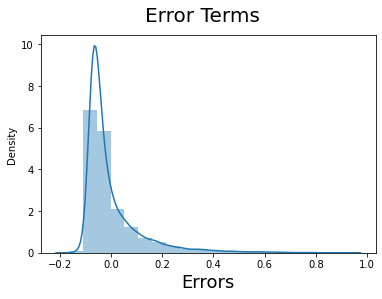

In [13]:
y_train_price = lm.predict(X_train_rfe)
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [14]:
df_test[df_test.columns] = scaler.fit_transform(df_test[df_test.columns])

y_test = df_test.pop('Flow')
X_test = df_test
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

<ipython-input-14-557b3c2147a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[df_test.columns] = scaler.fit_transform(df_test[df_test.columns])
c:\users\dany_\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
c:\users\dany_\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

In [15]:
y_pred

7379     0.075414
10102    0.079729
8765     0.088771
4353     0.075414
1036     0.076322
           ...   
3523     0.075414
6117     0.090404
18519    0.077501
960      0.111171
18907    0.075414
Length: 4018, dtype: float64

In [16]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred)

0.0029052255185185727

In [17]:
y_test

7379     0.039841
10102    0.095163
8765     0.021729
4353     0.000005
1036     0.078415
           ...   
3523     0.064912
6117     0.147775
18519    0.052361
960      0.074609
18907    0.010739
Name: Flow, Length: 4018, dtype: float64

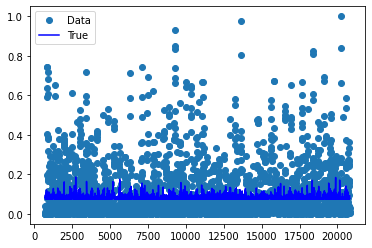

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(y_test.sort_index(), 'o', label="Data")
ax.plot(y_pred.sort_index(), 'b-', label="True")
#ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");